# Example Data Analysis

In [19]:
# Import some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
% matplotlib inline

In [2]:
# Let's clone a github repository that has some sample data in it
# The "!" tells jupyer to execute the following line with bash
!git clone https://github.com/ejolly/github_APS17

Cloning into 'github_APS17'...
remote: Counting objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.


In [3]:
data_dir = os.path.join('./github_APS17/data/sample_data.csv')

In [21]:
df = pd.read_csv(data_dir)
df.head()

,Liking,Cat_Breed
0,7.936508,Siamese
1,15.277778,Ragdoll
2,0.000000,Persian
3,9.523810,Siamese
4,0.000000,Ragdoll


In [22]:
df.describe()

,Liking
count,564.000000
mean,42.069297
std,30.635703
min,0.000000
25%,9.474207
50%,50.000000
75%,66.914682
max,100.000000


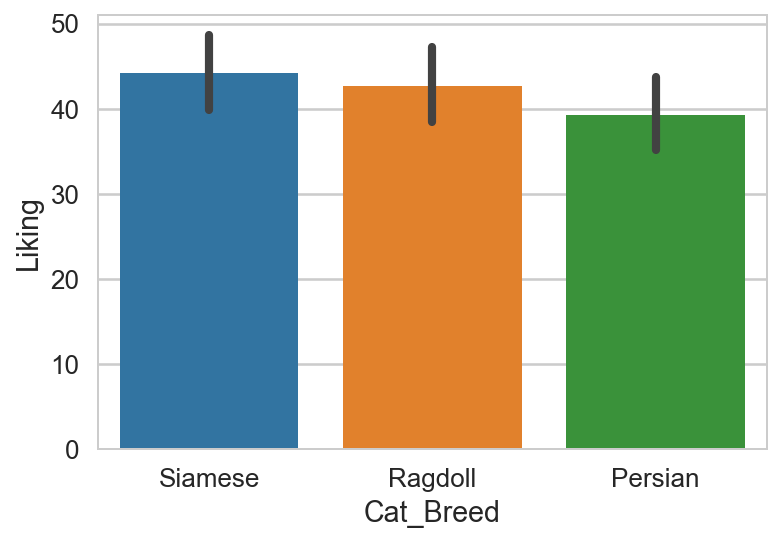

In [6]:
sns.set_context('talk');
sns.set_style('whitegrid');
sns.barplot(x='Cat_Breed',y='Liking',data=df)

It looks like there might be a linear trend across groups.

In [15]:
from pymer4.models import Lm

In [17]:
df['Linear_Contrast'] = df['Cat_Breed'].map({'Siamese':-1,'Ragdoll':0,'Persian':1})
df.head()

,Liking,Cat_Breed,Linear_Contrast
0,7.936508,Siamese,-1
1,15.277778,Ragdoll,0
2,0.000000,Persian,1
3,9.523810,Siamese,-1
4,0.000000,Ragdoll,0


In [18]:
model = Lm('Liking ~ Linear_Contrast',data=df)
model.fit()

Formula: Liking ~ Linear_Contrast

Family: gaussian

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 564	 R^2: 0.004	 R^2_adj: 0.002

Log-likelihood: -2728.685 	 AIC: 5461.369	 BIC: 5470.039

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
Intercept,42.069,39.539,44.600,1.288,562,32.652,0.000,***
Linear_Contrast,-2.441,-5.540,0.659,1.578,562,-1.547,0.122,


No significant trend